In [1]:
# Install libraries
%pip install -U pysr

  Using cached pysr-1.5.8-py3-none-any.whl.metadata (54 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached juliacall-0.9.25-py3-none-any.whl.metadata (4.5 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached juliapkg-0.1.17-py3-none-any.whl.metadata (6.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:001.6 MB/s eta 0:00:01
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached semver-3.0.4-py3-none-any.whl.metadata (6.8 kB)
Using cached pysr-1.5.8-py3-none-any.whl (99 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached juliacall-0.9.25-py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 44.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Using

In [2]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import drive
from pysr import PySRRegressor
import time
import math
import sympy as sym

[juliapkg] Found dependencies: /home/richard/Documents/p311a/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/richard/Documents/p311a/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /home/richard/Documents/p311a/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.6 to /home/richard/Documents/p311a/julia_env/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.11/julia-1.11.6-linux-x86_64.tar.gz
 

    Updating registry at `~/.julia/registries/General.toml`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/Documents/p311a/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.25
⌅ [8254be44] + SymbolicRegression v1.11.3
⌅ [458c3c95] + OpenSSL_jll v3.0.16+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/Documents/p311a/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.2
  [8d63f2c5] + DispatchDoctor v0.4.26
  [ff

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


# Molecular Mass Dataset
Here we will take a first look at the molecular mass dataset, taken from [Goossens.](https://pubs.acs.org/doi/full/10.1021/ie950484l?casa_token=-Vy315d8K38AAAAA%3Anxdm5rReXldLbOrBYLfwm0l3MmsCw_Mbnw1vVdNJ308Ki_3lEcnU3bXQmS8TL2nsArNG-AydRFEKVZc)


In [3]:
#drive.mount('/content/drive')
df=pd.read_csv('./goossens_raw.csv')
#df=pd.read_csv('./c694/goossens_raw.csv')
#df=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')
df

,SG,TBP,MW
0,0.6310,306,76
1,0.7135,372,99
2,0.7205,365,96
3,0.7293,373,100
4,0.6786,329,82
...,...,...,...
65,0.7054,367,95
66,0.6315,309,72
67,0.8842,353,78
68,1.1762,612,178


We have 3 variables:

|Variable|Description|Designation|
|---|---|---|
|$Mw$|Molecular Mass|dependent|
|$SG$|Specific Gravity|independent|
|$TBP$|True Boiling Point|independent|

We can designate any one of the three as dependent, but as the molecular mass is the most difficult to measure, we'll chose it.

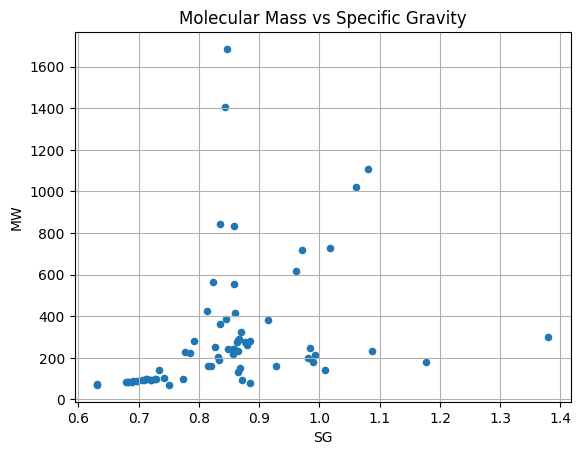

In [4]:
df.plot(kind='scatter',x='SG',y='MW')
plt.title("Molecular Mass vs Specific Gravity")
plt.grid()
plt.show()

Although there appears to be a clear linear relationship between molecular mass and specific gravity at low gravity numbers, the heteroscedasticity explodes above a gravity of about 0.75.

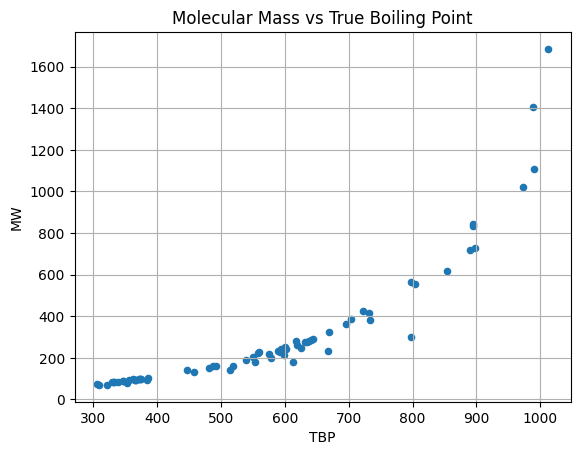

In [5]:
df.plot(kind='scatter',x='TBP',y='MW')
plt.title("Molecular Mass vs True Boiling Point")
plt.grid()
plt.show()

There seems to be a monotonically increasing relationship between molecular mass and true boiling point, with a possible "pole" around the boiling point of 1000.

At this point, it may be tempting to ignore the effect of specific gravity on the prediction of molecular mass.

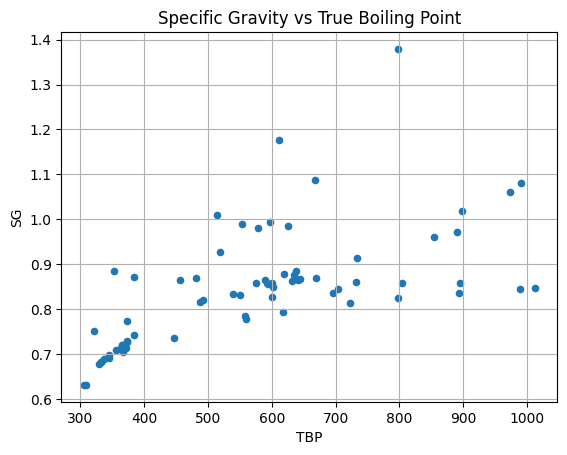

In [6]:
df.plot(kind='scatter',x='TBP',y='SG')
plt.title("Specific Gravity vs True Boiling Point")
plt.grid()
plt.show()

This plot suggests that there is very little correlation between specific gravity and true boiling point, except maybe at low values of boiling point.  Lets test this:

In [7]:
c_sg_tbp=np.corrcoef(df['SG'],df['TBP'])
print(c_sg_tbp)

[[1.         0.62521831]
 [0.62521831 1.        ]]


## Existing Correlations
There are many correlations available for estimating molecular mass from true boiling point and specific gravity.  Here are a few of them using the following nomenclature:

|Symbol|Meaning|
|---|---|
|$M_w$|Apparent Molecular Mass|
|$T_b$|Boiling Point Temperature at Atmospheric Pressure|
|$\gamma$|Specific Gravity (density compared to water)|
|$a_{00}..a_{09}$|Empirical Constants|
|$K_w$|Characterization factor (intermediate value)|
|$X_0...X_3$|Intermediate Variables|

### Hariu & Sage (1969)
${M} _ {w} = {a} _ {00} + {a} _ {01} {K} _ {w} + {a} _ {02} {K} _ {w} ^ {2} + {a} _ {03} {T} _ {b} {K} _ {w} + {a} _ {04} {T} _ {b} {K} _ {w} ^ {2} + {a} _ {05} {T} _ {b} ^ {2} {K} _ {w} + {a} _ {06} {T} _ {b} ^ {2} {K} _ {w} ^ {2}$

${K} _ {w} =\frac {\sqrt [3] {{T} _ {b}}}  {\gamma}$

### Kesler & Lee (1976)
${M} _ {w} = {X} _ {0} + \frac{{X} _ {1}}  {{T} _ {b}} + \frac{{X} _ {2}}  {{T} _ {b} ^ {2}}$

${X} _ {0} = {a} _ {00} + {a} _ {01} γ+ \left ({a} _ {02} + {a} _ {03} γ \right ) {T} _ {b}$

${X} _ {1} = \left (1+ {a} _ {04} γ+ {a} _ {05} {γ} ^ {2} \right ) \left ({a} _ {06} + \frac{{a} _ {07}}  {{T} _ {b}} \right ) \cdot {10} ^ {7}$

${X} _ {2} = \left (1+ {a} _ {08} γ+ {a} _ {09} {γ} ^ {2} \right ) \left ({a} _ {10} + \frac{{a} _ {11}}  {{T} _ {b}} \right ) \cdot {10} ^ {12}$

### American Petroleum Institute (1977)
${M} _ {w} = {a} _ {00} {e} ^ {\left ({a} _ {01} {T} _ {b} \right )} {e} ^ {\left ({a} _ {02} γ \right )} {T} _ {b} ^ {{a} _ {03}} {γ} ^ {{a} _ {04}}$

### Winn, Sim & Daubert (1980)
${M} _ {w} = {a} _ {00} {T} _ {b} ^ {{a} _ {01}} {γ} ^ {{a} _ {02}}$

### Riazi & Daubert (1980)
${M} _ {w} = {a} _ {00} {T} _ {b} ^ {{a} _ {01}} {γ} ^ {{a} _ {02}}$

### Rao & Bardon (1985)
$ln {{M} _ {w}} = \left ({a} _ {00} + {a} _ {01} {K} _ {w} \right ) ln {\left (\frac{{T} _ {b}}  {{a} _ {02} + {a} _ {03} {K} _ {w}} \right )}$

### Riazi & Daubert (1987)
${M} _ {w} = {a} _ {00} {T} _ {b} ^ {{a} _ {01}} {γ} ^ {{a} _ {02}} {e} ^ {\left ({a} _ {03} {T} _ {b} + {a} _ {04} γ+ {a} _ {05} {T} _ {b} γ \right )}$

### Goossens (1996)
${M} _ {w} = {a} _ {00} {T} _ {b} ^ {{X} _ {0}}$

${X} _ {0} =\frac {{a} _ {03} + {a} _ {04} ln {\left (\frac{{T} _ {b}}  {{a} _ {05} - {T} _ {b}} \right )}}  {{a} _ {01} γ + {a} _ {02}}$

### Linan (2011)
${M} _ {w} = {a} _ {00} {e} ^ {\left ({a} _ {01} {T} _ {b} \right )} {e} ^ {\left ({a} _ {02} γ \right )} {T} _ {b} ^ {{a} _ {03}} {γ} ^ {{a} _ {04}}$

### Hosseinifar & Shahverdi (2021)
${M} _ {w} = {\left [{a} _ {00} {T} _ {b} ^ {{a} _ {01}} {\left (\frac{3+2γ} {3-γ} \right )} ^ {\frac{{a} _ {02}} {2}} + {a} _ {03} {T} _ {b} ^ {{a} _ {04}} {\left (\frac{3+2γ} {3-γ} \right )} ^ {\frac{{a} _ {05}} {2}} \right ]} ^ {{a} _ {06}}$

### Stratiev (2022)
${M} _ {w} = {a} _ {00} + {a} _ {01} {e} ^ {\left [{a} _ {02} {e} ^ {\left ({a} _ {03} \frac{{T} _ {b} ^ {{a} _ {06}}} {{γ} ^ {{a} _ {05}}} \right )} \right ]}$


### Observations
On the assumption that all of these correlations are, at least, reasonable, then it appears as though many different functional forms may work.

### First Run
Let's see what happens if we present this data to PySR:

In [8]:
y=df['MW']
#print(y)
x=df[['SG','TBP']]
print(x)


        SG  TBP
0   0.6310  306
1   0.7135  372
2   0.7205  365
3   0.7293  373
4   0.6786  329
..     ...  ...
65  0.7054  367
66  0.6315  309
67  0.8842  353
68  1.1762  612
69  1.3793  798

[70 rows x 2 columns]


In [9]:
t0 = time.time()
myMod=PySRRegressor(random_state=7,deterministic=True,parallelism='serial')
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p311a/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 9.240e+04
Progress: 431 / 3100 total iterations (13.903%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.59
3           2.941e+04  5.897e-01  y = TBP + -270.61
5           1.858e+04  2.281e-01  y = (TBP * 0.00093598) * TBP
7           7.214e+03  4.724e-01  y = ((TBP * TBP) * 1.1819e-06) * TBP
9           6.138e+03  8.049e-02  y = (TBP * ((TBP * 0.0032559) + -2.6517)) + 631.63
11          4.497e+03  1.552e-01  y = (0.0010394 / SG) * (TBP * (TBP * (TBP * 0.0010808)))
13          3.549e+03  1.183e-01  y = TBP * ((0.00039856 / SG) * (((TBP - 178.35) * TBP) * 0...
                                      .0034851))
15          2.039e+03  2.768e-01  y = (((((TBP - 426.95) * TBP) * (TBP * 1.8921e-06)) + 85.1...
               

[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.060e+05
Progress: 3022 / 3100 total iterations (97.484%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.59
3           2.941e+04  5.897e-01  y = TBP - 270.62
5           1.858e+04  2.281e-01  y = (TBP * 0.00093598) * TBP
7           2.607e+03  9.811e-01  y = 17472 / ((92526 / TBP) + -80.181)
9           4.690e+02  8.576e-01  y = 27972 / (SG * ((1.6592e+05 / TBP) - 144.56))
11          5.409e+01  1.080e+00  y = (85053 / SG) / ((3.2391e+05 / (TBP + -151.63)) + -316....
                                      23)
13          5.062e+01  3.316e-02  y = ((85048 / SG) / ((3.2378e+05 / (TBP - 140.19)) - 311.2...
                                      8)) + -8.2961
15          4.652e+01  4.225e-02  y = (SG * -13.492) + ((85048

### Results
Let's take a peek at how the predicted molecular mass looks compared to the actual:

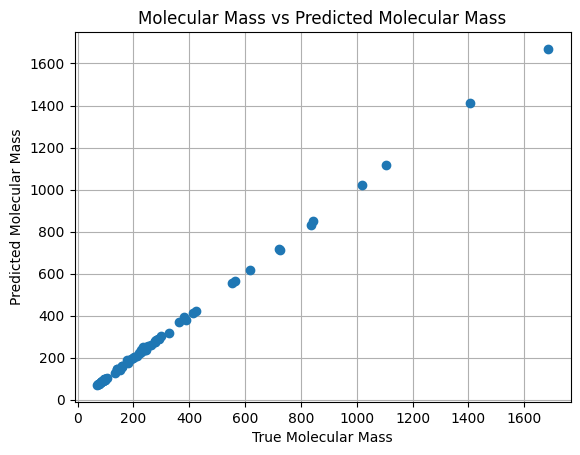

In [10]:
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

As the correlation looks reasonable, let us take a look at the equation:

In [11]:
myEq=myMod.sympy()
print(myEq)

4.5827713 - 0.37485117/(1.3891245 - SG) - TBP*((TBP + 49.876865)*0.024368146 - 41.479553)/(SG*(-80.92693 + 93240.055/TBP))


This looks dramatically different.  Lets us clean it up a bit:

In [12]:
sym.simplify(myEq)

4.5827713 + 0.37485117/(SG - 1.3891245) + TBP*(0.024368146*TBP - 40.2641462716577)/(SG*(80.92693 - 93240.055/TBP))

Next, we'll build a function for it, along with one for the Goossen's correlation which was based on the same data:

In [13]:
def firstTry(SG,TBP):
  a00=281.3607
  a01=1.4083161
  a02=163.50403
  a03=1181.708815
  mw=a00*(-SG**2 -(SG-a01)*(TBP-a02))
  mw/=SG*(SG-a01)*(TBP-a03)
  return mw

def secondTry(sg,tbp):
  a00=0.7157302
  a01=844.64886
  a02=31326.5860910937
  a03=198.543262798009
  a04=1.416703
  mw=(sg**2)*(a00*tbp-a01)+(a02-a03*tbp)*(sg-a04)
  mw/=(sg*(sg-a04)*(a00*tbp-a01))
  return mw

def thirdTry(sg,tbp):
  a00=4.5827713
  a01=0.37485117
  a02=1.3891245
  a03=0.024368146
  a04=40.2641462716577
  a05=80.92693
  a06=93240.055
  mw=a00+(a01/(sg-a02))
  mw+=(tbp*(a03*tbp-a04))/(sg*(a05-(a06/tbp)))
  return mw

def goos_Mw(sg,tbp):
  c0 = 0.01077
  c1 = 1.52869
  c2 = 0.06486
  c3 = 1078.0
  c4 = 0.0
  c5 = 1.002733049
  c6 = -0.006433370483
  t=tbp # No conversion necessary
  c4 = c1 + c2 * math.log(t / (c3 - t))
  return c0 * (t ** c4) / (sg * c5 + c6)

In [14]:
# Quick Test using the first datapoint
mw0=firstTry(0.6310,306.0)
print(mw0)
mw1=secondTry(0.6310,306.0)
print(mw1)
mw2=thirdTry(0.6310,306.0)
print(mw2)
mw3=goos_Mw(0.6310,306.0)
print(mw3)

72.295785575113
73.73956506101871
75.1843860895409
76.93791136542198
